In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
batch_size = 100

In [4]:

mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 147450423.62it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 100694674.83it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 134878428.02it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19539003.86it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size = 100, shuffle=True, drop_last=True)

In [6]:
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()

In [7]:
# 초깃값 설정
# 간단한 방식인 uniform과 normal (xavier, He) 있음
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0565,  0.0423, -0.0155,  ...,  0.1012,  0.0459, -0.0191],
        [ 0.0772,  0.0452, -0.0638,  ...,  0.0476, -0.0638,  0.0528],
        [ 0.0311, -0.1023, -0.0701,  ...,  0.0412, -0.1004,  0.0738],
        ...,
        [ 0.0334,  0.0187, -0.1021,  ...,  0.0280, -0.0583, -0.1018],
        [-0.0506, -0.0939, -0.0467,  ..., -0.0554, -0.0325,  0.0640],
        [-0.0183, -0.0123,  0.1025,  ..., -0.0214,  0.0220, -0.0741]],
       requires_grad=True)

In [8]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3, relu, linear4, relu, linear5).to(device)

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
total_batch = len(data_loader)
epochs = 20
for epoch in range(epochs+1):
    avg_cost = 0

    for x, y in data_loader:
        x = x.view(-1, 28*28).to(device)
        y = y.to(device)

        hypothesis = model(x)
        cost = F.cross_entropy(hypothesis, y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost/ total_batch
    print('Epoch: {:4d}, Cost: {:.6f}'.format(epoch, avg_cost))
print('Learning is finished')

Epoch:    0, Cost: 0.212599
Epoch:    1, Cost: 0.088597
Epoch:    2, Cost: 0.064850
Epoch:    3, Cost: 0.048198
Epoch:    4, Cost: 0.039000
Epoch:    5, Cost: 0.036551
Epoch:    6, Cost: 0.030971
Epoch:    7, Cost: 0.027354
Epoch:    8, Cost: 0.024268
Epoch:    9, Cost: 0.023774
Epoch:   10, Cost: 0.019108
Epoch:   11, Cost: 0.017049
Epoch:   12, Cost: 0.015141
Epoch:   13, Cost: 0.017075
Epoch:   14, Cost: 0.018074
Epoch:   15, Cost: 0.013824
Epoch:   16, Cost: 0.012501
Epoch:   17, Cost: 0.011349
Epoch:   18, Cost: 0.014479
Epoch:   19, Cost: 0.011305
Epoch:   20, Cost: 0.012572
Learning is finished


Accuracy: 0.9803


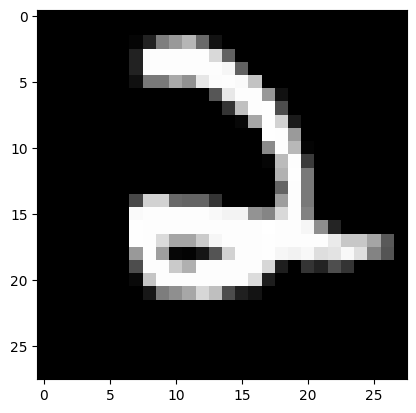

정답: 2
예측: 2


In [37]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = model(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy: {:.4f}'.format(accuracy.item()))

    r = random.randint(0, len(mnist_test)-1)
    single_test_x = mnist_test.test_data[r].view(-1,28*28).float().to(device)
    single_test_y = mnist_test.test_labels[r].to(device)

    prediction = model(single_test_x)
    pred_result = torch.argmax(prediction, 1).item()

    plt.imshow(mnist_test.test_data[r].squeeze(), cmap='gray', interpolation='nearest')
    plt.show()
    print('정답: {}'.format(single_test_y))
    print('예측: {}'.format(pred_result))